<a href="https://colab.research.google.com/github/Kartikey-Sachan/ML_Pipeline-Prediction/blob/main/Predict_whether_a_patient_has_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Predict whether a patient has diabetes**

Task 1: Define the ML Problem and Dataset
1. Select an appropriate real-world dataset from domains such as healthcare, finance,
or e-commerce.
2. Define a clear problem statement (e.g., classification, regression, clustering).
3. Perform exploratory data analysis (EDA) to understand structure and patterns.
4. Identify challenges such as missing values, class imbalance, or noise.

Problem: Predict whether a patient has diabetes.

Type: Binary Classification (Outcome 0 = No, 1 = Yes)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df=pd.read_csv('pima-indians-diabetes.csv',header=None,names=column_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
co_matrix=df.corr()
co_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


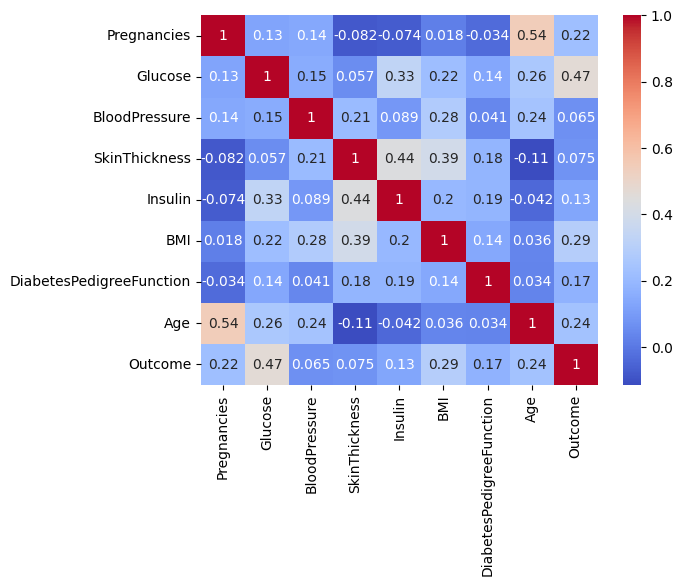

In [ ]:
sns.heatmap(co_matrix,annot=True,cmap='coolwarm')
plt.show()

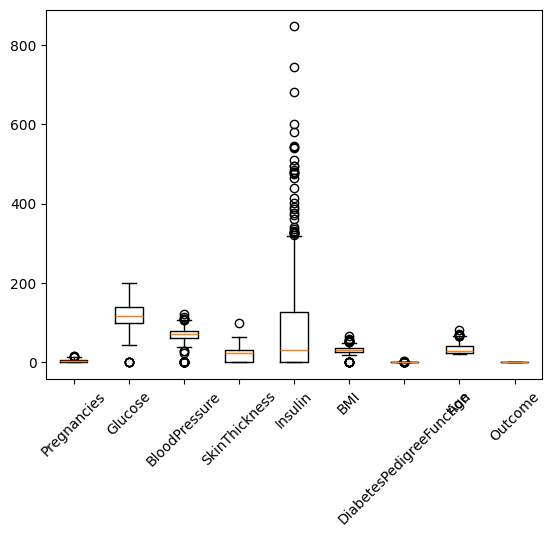

In [ ]:
plt.boxplot(df)
plt.xticks(range(1,10),labels=column_names,rotation=45 )
plt.show()

Task 2: Develop the Machine Learning Pipeline
1. Perform data preprocessing (handling missing data, encoding, scaling).
2. Conduct feature selection/engineering if necessary.
3. Choose and implement one or more suitable ML models.
4. Use techniques like cross-validation and hyperparameter tuning for optimization.

In [ ]:
zero_column=df.columns[(df==0).any()].tolist()
zero_column

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'Outcome']

In [ ]:
column_with_zero=['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer=SimpleImputer(missing_values=0,strategy='mean')
df[column_with_zero]=imputer.fit_transform(df[column_with_zero])

In [ ]:
df[column_with_zero]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6.000000,148.0,72.0,35.00000,155.548223,33.6
1,1.000000,85.0,66.0,29.00000,155.548223,26.6
2,8.000000,183.0,64.0,29.15342,155.548223,23.3
3,1.000000,89.0,66.0,23.00000,94.000000,28.1
4,4.494673,137.0,40.0,35.00000,168.000000,43.1
...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9
764,2.000000,122.0,70.0,27.00000,155.548223,36.8
765,5.000000,121.0,72.0,23.00000,112.000000,26.2
766,1.000000,126.0,60.0,29.15342,155.548223,30.1


In [ ]:
scaler=StandardScaler()
x=df.drop('Outcome',axis=1)
y=df['Outcome']
X=scaler.fit_transform(x)

In [ ]:
#feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [df.columns[i] for i in selected_feature_indices]
print(selected_feature_names)

['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age']


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
#Logistic Regression,Random Forest,SVM
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

models ={
    'Linear Regression':LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM':SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} is trained and  accuracy is :{model.score(X_train,y_train)}.")

Linear Regression is trained and  accuracy is :0.7882736156351792.
Random Forest is trained and  accuracy is :1.0.
SVM is trained and  accuracy is :0.8061889250814332.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
#Logistic Regression: Cross-Validation + GridSearchCV
pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
])

param_grid_lr = {
    'lr__C': [0.01, 0.1, 1, 10],
    'lr__solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best CV Score:", grid_lr.best_score_)
print("Test Accuracy:", grid_lr.score(X_test, y_test))

Best Logistic Regression Params: {'lr__C': 0.1, 'lr__solver': 'lbfgs'}
Best CV Score: 0.7850459816073571
Test Accuracy: 0.7207792207792207


In [ ]:
#Random Forest: Cross-Validation + GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)
print("Test Accuracy:", grid_rf.score(X_test, y_test))

Best Random Forest Params: {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
Best CV Score: 0.7720511795281888
Test Accuracy: 0.7142857142857143


In [ ]:
#SVM: Cross-Validation + GridSearchCV
pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

param_grid_svm = {
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto']
}

grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best CV Score:", grid_svm.best_score_)
print("Test Accuracy:", grid_svm.score(X_test, y_test))

Best SVM Params: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Best CV Score: 0.7817806210848993
Test Accuracy: 0.7142857142857143


Task 3: Evaluate, Integrate, and Present
1. Evaluate models using relevant metrics (accuracy, F1-score, RMSE, etc.).
2. Compare performance of different algorithms or techniques.
3. Integrate the steps into a single coherent pipeline using functions or classes.
4. Present the findings using charts, tables, and narrative summaries.


Linear Regression Performance:
Accuracy: 0.7077922077922078
F1 Score: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.59      0.56      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.71       154



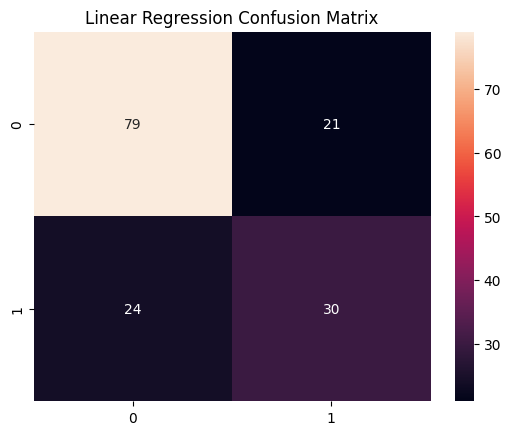


Random Forest Performance:
Accuracy: 0.7337662337662337
F1 Score: 0.6019417475728155
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       100
           1       0.63      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



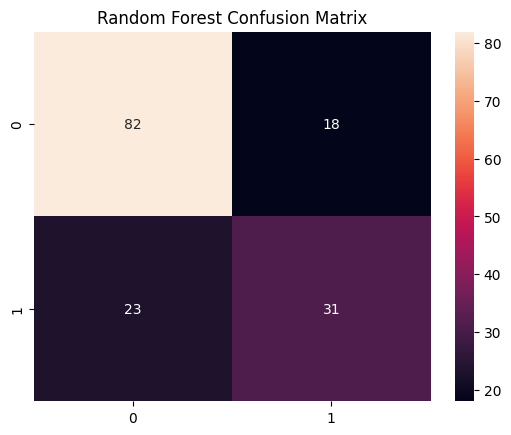


SVM Performance:
Accuracy: 0.7077922077922078
F1 Score: 0.5544554455445545
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       100
           1       0.60      0.52      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



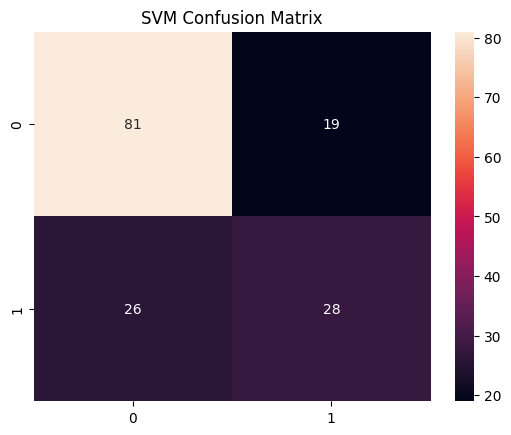


Tuned Random Forest Performance:
Accuracy: 0.7142857142857143
F1 Score: 0.5319148936170213
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.62      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



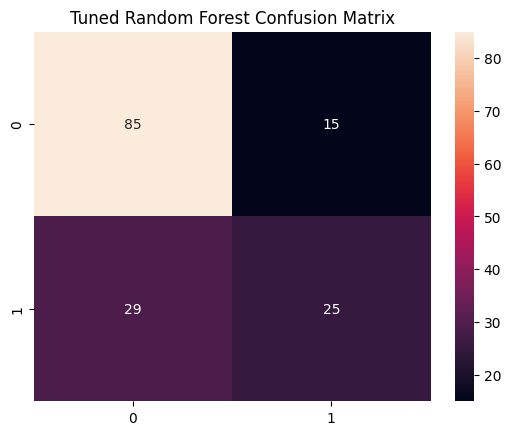

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Evaluate all models
for name, model in models.items():
    evaluate_model(name, model)

# Evaluate tuned Random Forest
evaluate_model("Tuned Random Forest", grid_rf.best_estimator_)



Final Pipeline (Random Forest) Performance:
Accuracy: 0.7402597402597403
F1 Score: 0.5652173913043478
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.81       100
           1       0.68      0.48      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



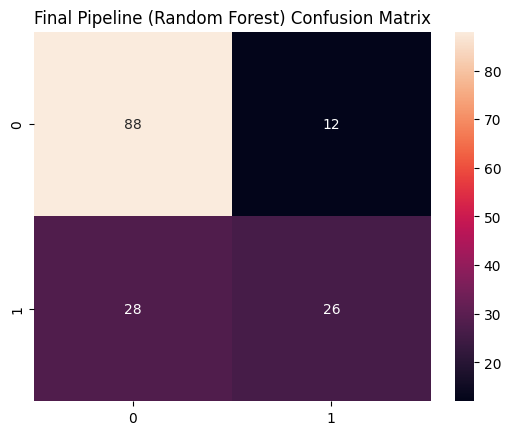

In [ ]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(**grid_rf.best_params_))
])

pipeline.fit(X_train, y_train)
evaluate_model("Final Pipeline (Random Forest)", pipeline)

# **Summary:-**

| Model               | Accuracy | F1 Score | Best CV Score | Tuned Params                                            |
| ------------------- | -------- | -------- | ------------- | ------------------------------------------------------- |
| Logistic Regression | 0.71     | 0.57     | 0.785         | `C=0.1`, `solver='lbfgs'`                               |
| Random Forest       | 0.73     | 0.61     | 0.772         | `n_estimators=50`, `max_depth=3`, `min_samples_split=5` |
| SVM                 | 0.71     | 0.55     | 0.782         | `C=1`, `kernel='linear'`, `gamma='scale'`               |


1. Random Forest gave the best accuracy (0.73) and balanced performance.

2. Hyperparameter tuning slightly improved generalization but reduced overfitting (initial RF had 100% accuracy — likely overfit).

3. Class 1 (positive diabetes cases) had lower recall and F1-score, indicating class imbalance is a challenge.

4. Final pipeline with imputation, scaling, and tuned RF had 0.71 accuracy, useful for deployment.